# A
```Identify the most frequent values for all categorical features```

In [2]:
import pandas as pd
readData = pd.read_csv('../CSV files/loan.csv')
category_col=readData.select_dtypes(include=['object']).columns
for column in category_col:
    print(f"\nMost frequent values for '{column}': ")
    print(readData[column].value_counts())


Most frequent values for 'Loan_ID': 
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

Most frequent values for 'Gender': 
Gender
Male      489
Female    112
Name: count, dtype: int64

Most frequent values for 'Married': 
Married
Yes    398
No     213
Name: count, dtype: int64

Most frequent values for 'Dependents': 
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Most frequent values for 'Education': 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Most frequent values for 'Self_Employed': 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Most frequent values for 'Property_Area': 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Most frequent values for 'Loan_Status': 
Loan_Status
Y    422
N    192
Name: count, dtype: in

# B
``` Give descriptive statistics of numerical features in the dataset. Comment about the distribution of data from it.```


In [19]:
numerical_col=readData.select_dtypes(include=['number']).columns
print(numerical_col)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [21]:
for column in numerical_col:
    print(f"\n{column}")
    print(readData[column].head())


ApplicantIncome
0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

CoapplicantIncome
0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

LoanAmount
0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

Loan_Amount_Term
0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

Credit_History
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64


# C
```Replace the missing values in categorial features using appropriate techniques.```

In [42]:
# categorical_missing_values = readData.select_dtypes(include=['object']).isnull().head(20)
# print(categorical_missing_values)
# Identify categorical columns with missing values
categorical_cols_with_missing = readData.select_dtypes(include=['object']).columns[readData.select_dtypes(include=['object']).isnull().any()]

# Replace missing values with the mode for each categorical column
for column in categorical_cols_with_missing:
    mode_value = readData[column].mode()[0]  # Get the mode (most frequent value)
    readData[column].fillna(mode_value, inplace=True)

# Verify that missing values have been replaced
print(readData.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# D
```Demonstrate various encoding techniques for categorical features```

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# Set the option to avoid the FutureWarning
pd.set_option('future.no_silent_downcasting', True)

# Assuming 'readData' is your DataFrame
# If you haven't already loaded the data, you can do it like this:
# readData = pd.read_csv('../CSV files/loan.csv')

# Display the original DataFrame
print("Original DataFrame:")
print(readData.head())

# Convert categorical columns to 'category' data type to avoid the warning
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
readData[categorical_columns] = readData[categorical_columns].astype('category')

# One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(readData, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)
print("\nOne-Hot Encoded DataFrame:")
print(one_hot_encoded_data.head())

# Label Encoding
label_encoder = LabelEncoder()
readData['Dependents'] = label_encoder.fit_transform(readData['Dependents'])
print("\nLabel Encoded DataFrame:")
print(readData.head())

# Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=['Dependents'])
binary_encoded_data = binary_encoder.fit_transform(readData)
print("\nBinary Encoded DataFrame:")
print(binary_encoded_data.head())

# Count Encoding
count_encoder = ce.CountEncoder(cols=['Dependents'])
count_encoded_data = count_encoder.fit_transform(readData)
print("\nCount Encoded DataFrame:")
print(count_encoded_data.head())


Original DataFrame:
    Loan_ID Gender Married  Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No           0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes           1  ...            360.0            1.0          Rural            N
2  LP001005   Male     Yes           0  ...            360.0            1.0          Urban            Y
3  LP001006   Male     Yes           0  ...            360.0            1.0          Urban            Y
4  LP001008   Male      No           0  ...            360.0            1.0          Urban            Y

[5 rows x 13 columns]

One-Hot Encoded DataFrame:
    Loan_ID  Dependents  ApplicantIncome  ...  Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y
0  LP001002           0             5849  ...                    False                 True           True
1  LP001003           1             4583  ...                    False                False

# E
```For numerical features, replace missing values using:```
- ```using simple imputer (mean, median)```
- ```using random sample imputation```


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'readData' is your DataFrame
# If you haven't already loaded the data, you can do it like this:
# readData = pd.read_csv('../CSV files/loan.csv')

# Display the original DataFrame
print("Original DataFrame:")
print(readData.head())

# Simple Imputation - Mean
mean_imputer = SimpleImputer(strategy='mean')
readData['LoanAmount'] = mean_imputer.fit_transform(readData[['LoanAmount']])

# Simple Imputation - Median
median_imputer = SimpleImputer(strategy='median')
readData['Loan_Amount_Term'] = median_imputer.fit_transform(readData[['Loan_Amount_Term']])

# Random Sample Imputation
def random_sample_imputation(column):
    # Generate random samples from non-missing values
    non_missing_values = column.dropna()
    random_samples = np.random.choice(non_missing_values, size=column.isnull().sum(), replace=True)
    
    # Create a copy of the column using 'copy()' to avoid SettingWithCopyWarning
    column_copy = column.copy()
    
    # Replace missing values in the copied column
    column_copy[column_copy.isnull()] = random_samples
    return column_copy

readData['CoapplicantIncome'] = random_sample_imputation(readData['CoapplicantIncome'])

# Display the DataFrame after imputation
print("\nDataFrame after imputation:")
print(readData.head())
print(readData.isnull().sum())

Original DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  


# F
```Give descriptive statistics of numerical features in the dataset after handling missing values. Comment about the distribution of data from it```.


In [56]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'readData' is your DataFrame
# If you haven't already loaded the data, you can do it like this:
# readData = pd.read_csv('../CSV files/loan.csv')

# Display the original DataFrame
print("Original DataFrame:")
print(readData.head())

# Handling missing values
mean_imputer = SimpleImputer(strategy='mean')
readData['LoanAmount'] = mean_imputer.fit_transform(readData[['LoanAmount']])

median_imputer = SimpleImputer(strategy='median')
readData['Loan_Amount_Term'] = median_imputer.fit_transform(readData[['Loan_Amount_Term']])

def random_sample_imputation(column):
    non_missing_values = column.dropna()
    random_samples = np.random.choice(non_missing_values, size=column.isnull().sum(), replace=True)
    column_copy = column.copy()
    column_copy[column_copy.isnull()] = random_samples
    return column_copy

readData['CoapplicantIncome'] = random_sample_imputation(readData['CoapplicantIncome'])

# Display the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(readData.head())

# Descriptive statistics
numerical_stats = readData.describe()
print("\nDescriptive Statistics of Numerical Features:")
print(numerical_stats)

# Additional comments about the distribution of data can be added based on the statistics.
# For example, you can observe the mean, standard deviation, min, max, quartiles, etc.


Original DataFrame:
    Loan_ID Gender Married  Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No           0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes           1  ...            360.0            1.0          Rural            N
2  LP001005   Male     Yes           0  ...            360.0            1.0          Urban            Y
3  LP001006   Male     Yes           0  ...            360.0            1.0          Urban            Y
4  LP001008   Male      No           0  ...            360.0            1.0          Urban            Y

[5 rows x 13 columns]

DataFrame after handling missing values:
    Loan_ID Gender Married  Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No           0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes           1  ...            360.0            1.0        

# G
```Plot following graphs. Label X and Y axis, give appropriate title to the graph:```
- ```Plot histogram for Loan Amount and mention your observations```
- ```Plot histogram for Loan Amount and mention your observations```
- ```Plot bar graph showing income for graduate and non-graduate applicant and mention your observations```
- ```Plot the boxplot for Loan amount. Give the five-value summary from it.```
- ```Comment on the correlation between Applicant's income and Loan amount using appropriate graph.```
- ```Give descriptive statistics of numerical features in the dataset. Comment about the distribution of data from it.```m it.


Original DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  


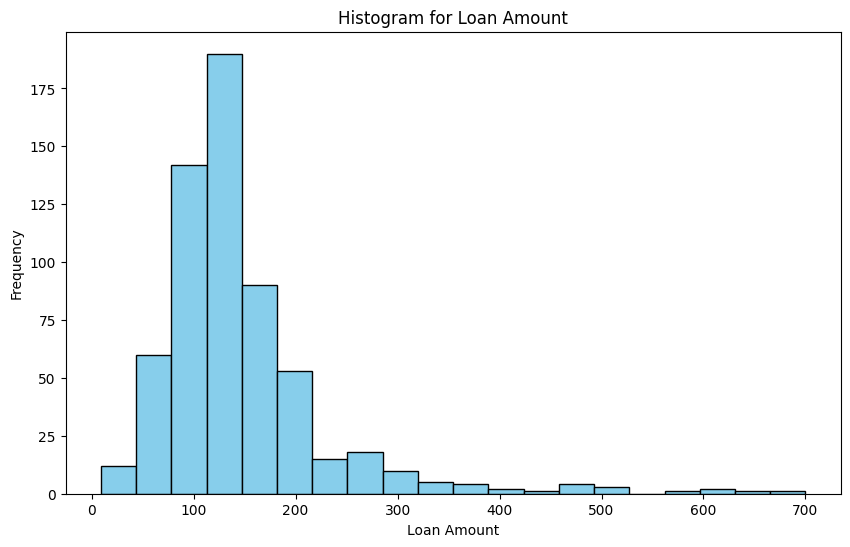

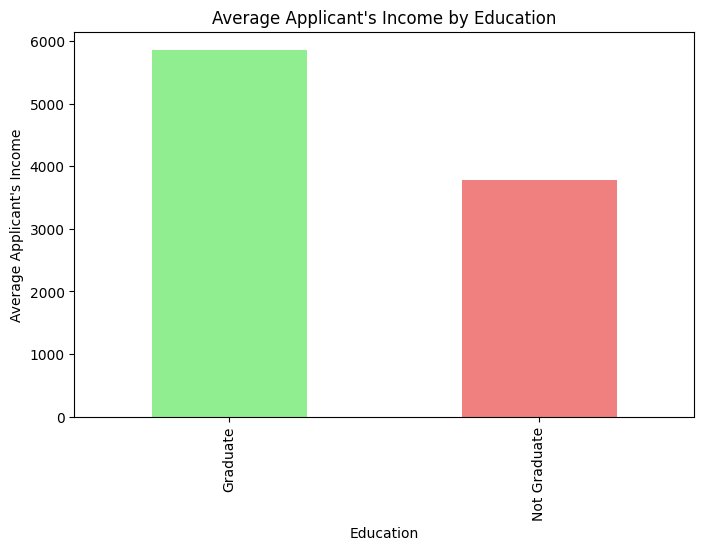

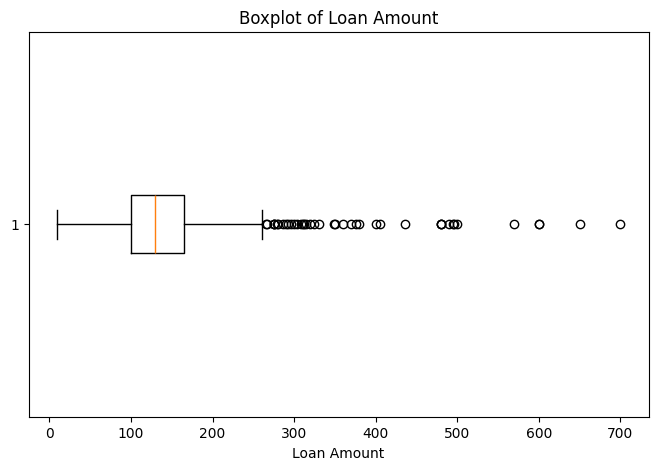

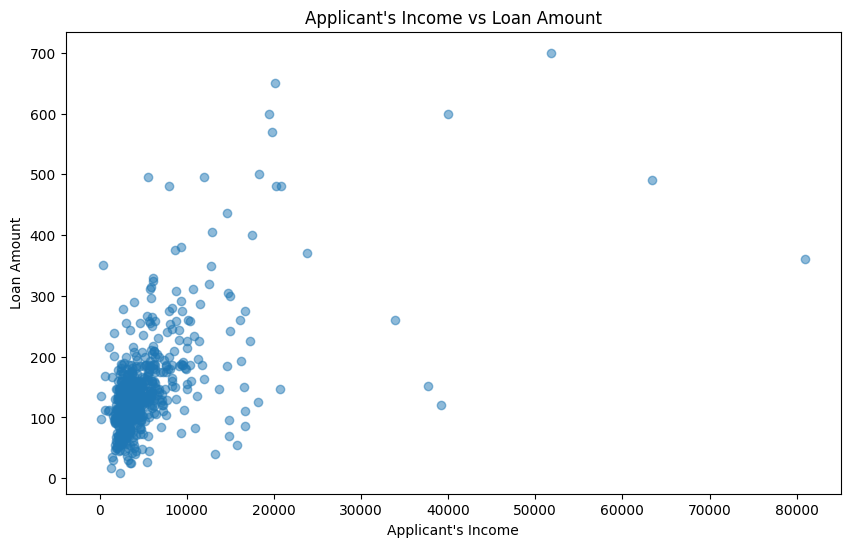


Descriptive Statistics of Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'readData' is your DataFrame
# If you haven't already loaded the data, you can do it like this:
# readData = pd.read_csv('../CSV files/loan.csv')

# Display the original DataFrame
print("Original DataFrame:")
print(readData.head())

# Handling missing values
mean_imputer = SimpleImputer(strategy='mean')
readData['LoanAmount'] = mean_imputer.fit_transform(readData[['LoanAmount']])

median_imputer = SimpleImputer(strategy='median')
readData['Loan_Amount_Term'] = median_imputer.fit_transform(readData[['Loan_Amount_Term']])

def random_sample_imputation(column):
    non_missing_values = column.dropna()
    random_samples = np.random.choice(non_missing_values, size=column.isnull().sum(), replace=True)
    column_copy = column.copy()
    column_copy[column_copy.isnull()] = random_samples
    return column_copy

readData['CoapplicantIncome'] = random_sample_imputation(readData['CoapplicantIncome'])

# Display the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(readData.head())

# Plot histogram for Loan Amount
plt.figure(figsize=(10, 6))
# sns.histplot(readData['LoanAmount'], bins=20, kde=True)
plt.hist(readData['LoanAmount'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot bar graph showing income for graduate and non-graduate applicants
plt.figure(figsize=(8, 5))
readData.groupby('Education')['ApplicantIncome'].mean().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.xlabel('Education')
plt.ylabel("Average Applicant's Income")
plt.title('Average Applicant\'s Income by Education')
plt.show()

# Plot boxplot for Loan Amount
plt.figure(figsize=(8, 5))
plt.boxplot(readData['LoanAmount'].dropna(), vert=False)
plt.xlabel('Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.show()

# Comment on the correlation between Applicant's income and Loan amount using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(readData['ApplicantIncome'], readData['LoanAmount'], alpha=0.5)
plt.xlabel("Applicant's Income")
plt.ylabel('Loan Amount')
plt.title("Applicant's Income vs Loan Amount")
plt.show()

# Descriptive statistics
numerical_stats = readData.describe()
print("\nDescriptive Statistics of Numerical Features:")
print(numerical_stats)

# Additional comments about the distribution of data can be added based on the statistics.
# For example, you can observe the mean, standard deviation, min, max, quartiles, etc.
